In [30]:
import heapq

import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import sklearn_evaluation
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import SVC, LinearSVC

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier
import heapq


You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


In [16]:
X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train_default, X_test_default, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
y_train = y_train.ravel()


perform
4
feature
selection
methods

In [17]:
index_for_removal = np.array(
    [
        0, 10, 14, 17, 25, 26, 35, 39, 49, 59, 62,
    ]
)
X_train_zero_variance = np.delete(X_train_default, index_for_removal, 1)
X_test_zero_variance = np.delete(X_test_default, index_for_removal, 1)



select_univariate = SelectPercentile(percentile=90)
# select_univariate.fit(X_train_zero_variance, y_train)
# X_train_univariate = select_univariate.transform(X_train_zero_variance)
# X_test_univariate = select_univariate.transform(X_test_zero_variance)

rf = RandomForestClassifier(
    n_estimators=200,
    max_features=3,
).fit(X_train_default, y_train)

select_sfm = SelectFromModel(
    rf,
    threshold='0.1*mean',
)
# select_sfm.fit(X_train_univariate, y_train)
# X_train_from_model = select_sfm.transform(X_train_univariate)
# X_test_from_model = select_sfm.transform(X_test_univariate)

select_rfe = RFE(
    RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    n_features_to_select=40
)

# select_rfe.fit(X_train_from_model, y_train)
# X_train_iterative = select_rfe.transform(X_train_from_model)
# X_test_iterative = select_rfe.transform(X_test_from_model)


standard
scaler: default and post - feature
selection

In [18]:
scaler_standard_default = StandardScaler().fit(X_train_default)
X_train_standard_default = scaler_standard_default.transform(X_train_default)
X_test_standard_default = scaler_standard_default.transform(X_test_default)

scaler_standard_variance = StandardScaler().fit(X_train_zero_variance)
X_train_standard_variance = scaler_standard_variance.transform(X_train_zero_variance)
X_test_standard_variance = scaler_standard_variance.transform(X_test_zero_variance)
#
# scaler_standard_refined = StandardScaler().fit(X_train_iterative)
# X_train_standard_refined = scaler_standard_refined.transform(X_train_iterative)
# X_test_standard_refined = scaler_standard_refined.transform(X_test_iterative)


robust
scaler: default and post - feature
selection

In [19]:

scaler_robust_default = RobustScaler().fit(X_train_default)
X_train_robust_default = scaler_robust_default.transform(X_train_default)
X_test_robust_default = scaler_robust_default.transform(X_test_default)

scaler_robust_variance = RobustScaler().fit(X_train_zero_variance)
X_train_robust_variance = scaler_robust_variance.transform(X_train_zero_variance)
X_test_robust_variance = scaler_robust_variance.transform(X_test_zero_variance)
#
# scaler_robust_refined = RobustScaler().fit(X_train_iterative)
# X_train_robust_refined = scaler_robust_refined.transform(X_train_iterative)
# X_test_robust_refined = scaler_robust_refined.transform(X_test_iterative)


minmax scaler: default and post-feature selection

In [20]:
scaler_minmax_default = MinMaxScaler().fit(X_train_default)
X_train_minmax_default = scaler_minmax_default.transform(X_train_default)
X_test_minmax_default = scaler_minmax_default.transform(X_test_default)

scaler_minmax_variance = MinMaxScaler().fit(X_train_zero_variance)
X_train_minmax_variance = scaler_minmax_variance.transform(X_train_zero_variance)
X_test_minmax_variance = scaler_minmax_variance.transform(X_test_zero_variance)
#
# scaler_minmax_refined = MinMaxScaler().fit(X_train_iterative)
# X_train_minmax_refined = scaler_minmax_refined.transform(X_train_iterative)
# X_test_minmax_refined = scaler_minmax_refined.transform(X_test_iterative)


PCA: default and post - feature
selection

In [21]:
pca_default = PCA(n_components=56, random_state=42)
X_train_pca_default = pca_default.fit_transform(X_train_standard_default)
X_test_pca_default = pca_default.transform(X_test_standard_default)

pca_refined = PCA(n_components=37, random_state=42)
# X_train_pca_refined = pca_refined.fit_transform(X_train_standard_refined)
# X_test_pca_refined = pca_refined.transform(X_test_standard_refined)


In [39]:

knn_pipeline = make_pipeline(
    select_univariate,
    select_sfm,
    select_rfe,
    KNeighborsClassifier(
        n_neighbors=5,
    )
)

logreg = LogisticRegression(C=4.736842)
logreg_pipeline = make_pipeline(
    MinMaxScaler(),
    logreg
)

lsvc = CalibratedClassifierCV(LinearSVC(C=1.842105))
lsvc_pipeline = make_pipeline(
    select_univariate,
    select_sfm,
    select_rfe,
    MinMaxScaler(),
    lsvc
)



mnb = MultinomialNB(alpha=0.210526)
mnb_pipeline = make_pipeline(
    mnb
)

rf = RandomForestClassifier(
    n_estimators=400,
    max_features=3,
    random_state=42
)
rf_pipeline = make_pipeline(
    rf
)

gbrt = GradientBoostingClassifier(
    n_estimators=400,
    max_depth=1,
    learning_rate=0.1,
    random_state=42
)
gbrt_pipeline = make_pipeline(
    gbrt
)

ksvm_pipeline = make_pipeline(
    MinMaxScaler(),
    SVC(
        kernel='rbf',
        C=5,
        degree=1,
        random_state=42
    )
)

mlp = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=512,
    alpha=0.01,
    random_state=42
)
mlp_pipeline = make_pipeline(
    MinMaxScaler(),
    mlp
)

votingClf = VotingClassifier(
    [
        ('clf1', logreg),
        ('clf2', rf)
    ],
    voting='soft'
)
adaCombo = AdaBoostClassifier(base_estimator=votingClf)
# adaCombo.fit(X_train_pca, y_train)


In [40]:

estimators = [
    ('ada', adaCombo),
    ("mlp", mlp_pipeline),
    ("gbrt", gbrt_pipeline),
    ("ksvm", ksvm_pipeline),
    # # ("rf", rf_pipeline),
    # # ("mnb", mnb_pipeline),
    # ("knn", knn_pipeline),
    ("lsvc", lsvc_pipeline),
    ("mnb", mnb_pipeline),
    ("logreg", logreg_pipeline),
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=logreg_pipeline
)

In [41]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    stacking_classifier.fit(X_train_default, y_train)

print(stacking_classifier.score(X_train_default, y_train))
print(stacking_classifier.score(X_test_default, y_test))

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 14 25 26 35 39 59 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 14 25 26 35 39 42 59 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/

0.9881690140845071
0.9527027027027027


In [119]:
voting_classifier = VotingClassifier(
    estimators=estimators,
)
voting_classifier.fit(X_train_default, y_train)
print(voting_classifier.score(X_train_default, y_train))
print(voting_classifier.score(X_test_default, y_test))


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

0.9723943661971831
0.9211711711711712


In [38]:
stacking_classifier.estimators_

[AdaBoostClassifier(base_estimator=VotingClassifier(estimators=[('clf1',
                                                                 LogisticRegression(C=4.736842)),
                                                                ('clf2',
                                                                 RandomForestClassifier(max_features=3,
                                                                                        n_estimators=400,
                                                                                        random_state=42))],
                                                    voting='soft')),
 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('mlpclassifier',
                  MLPClassifier(alpha=0.01, hidden_layer_sizes=512,
                                random_state=42))]),
 Pipeline(steps=[('gradientboostingclassifier',
                  GradientBoostingClassifier(max_depth=1, n_estimators=400,
                                      

In [42]:

y_pred_1 = stacking_classifier.estimators_[1].predict_proba(X_test_default)
print(y_pred_1)

[[9.99988811e-01 9.74478598e-28 6.16410666e-22 ... 5.84219144e-21
  4.12387238e-18 8.11256651e-11]
 [9.72054629e-01 8.86809487e-07 6.82530250e-08 ... 1.45719651e-07
  4.13535802e-03 5.12773474e-04]
 [1.71392036e-11 2.02657265e-09 1.23878394e-03 ... 1.35102486e-09
  1.86057071e-10 5.96271964e-05]
 ...
 [8.19657851e-05 9.13842400e-02 4.11132857e-02 ... 4.18785585e-01
  1.14880441e-01 3.11345529e-01]
 [1.14078527e-08 2.48224665e-08 4.81866288e-08 ... 1.03304398e-06
  1.92613989e-09 4.66060246e-06]
 [1.76081701e-04 4.40438062e-07 2.66042150e-05 ... 1.86018831e-03
  1.39461066e-03 4.57019761e-04]]


In [44]:
y_pred = stacking_classifier.predict(X_test_default)
y_pred_proba = stacking_classifier.predict_proba(X_test_default)
print(y_pred_proba.shape)
pd.DataFrame({'pred': y_pred, 'proba': y_pred_proba[:, 1]})
f1_stacking = f1_score(
    y_true=y_test,
    y_pred=y_pred,
    average=None
)
print(f1_stacking)

(444, 9)
[1.         0.9047619  0.93877551 0.96774194 0.93913043 0.99115044
 0.95238095 0.96062992 0.88709677]


In [107]:
knn = KNeighborsClassifier(
    n_neighbors=5
)

bag_knn = BaggingClassifier(
    base_estimator=knn,
    n_estimators=2000,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=True,
    random_state=42
).fit(X_train_pca, y_train)

In [108]:
knn.fit(X_test_pca, y_test)
print(knn.score(X_test_pca, y_test))
print(bag_knn.score(X_test_pca, y_test))

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8085585585585585
0.8288288288288288


estimators 200 .78
estimators 2000 .80
bootstrap features false .81
bootstrap features true .82
max features .5 0.806
5 neighbors 0.828

In [112]:
lsvc = LinearSVC(
    C=0.4081632653061224
)

bag_lsvc = BaggingClassifier(
    base_estimator=lsvc,
    n_estimators=100,
    max_samples=1.0,
    max_features=0.5,
    bootstrap=True,
    bootstrap_features=True,
    random_state=42
).fit(X_train_pca, y_train)

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

In [111]:
lsvc.fit(X_test_pca, y_test)
print(lsvc.score(X_test_pca, y_test))
print(bag_lsvc.score(X_test_pca, y_test))

0.9459459459459459
0.8400900900900901


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Viewing Images

In [53]:
print(stacking_classifier.predict([X[666]]))
print(y[666])


[3]
[3]


In [ ]:
images = pd.read_csv("../dataset/raw_images.csv").values

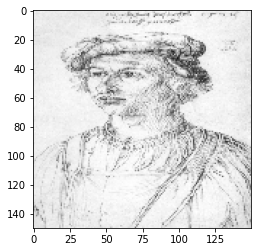

In [49]:
plt.imshow(images[666].reshape(150,150,3))

In [50]:
print('hw2')

hw2
